In [1]:
import pandas as pd
import psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
franquicias_hist = pd.read_csv('../datos_finales/franquicias_historicas.csv')
standings_2003 = pd.read_csv('../datos_finales/standings_2003.csv')
salarios_jordan = pd.read_csv('../datos_finales/salarios_jordan.csv')
df_regular_season_jordan = pd.read_csv('../datos_finales/regular_season_jordan.csv')
df_temporadas_jordan = pd.read_csv('../datos_finales/temporadas_jordan.csv')
df_playoffs_jordan = pd.read_csv('../datos_finales/playoffs_jordan.csv')
df_campeonato_jordan = pd.read_csv('../datos_finales/campeonatos_jordan.csv')
standings_2024 = pd.read_csv('../datos_finales/standings_2024.csv')
salarios_lebron = pd.read_csv('../datos_finales/salarios_lebron.csv')
df_regular_season_lebron = pd.read_csv('../datos_finales/regular_season_lebron.csv')
df_playoff_lebron = pd.read_csv('../datos_finales/playoffs_lebron.csv')
df_temporadas_lebron = pd.read_csv('../datos_finales/temporadas_lebron.csv')
df_campeonato_lebron = pd.read_csv('../datos_finales/campeonatos_lebron.csv')

In [2]:
try:
    conexion = psycopg2.connect(
    database = 'GOAT',
    user = 'postgres',
    password = 'admin',
    host = 'localhost',
    port = '5432')
except OperationalError as e: #el alias es e
    if e.pgcode == errorcodes.INVALID_PASSWORD:
        print('la contraseña es erronea')
    elif e.pgcode == errorcodes.CONNECTION_EXCEPTION:
        print('error de conexion')
    else:
        print(f'el error es el siguiente {e}')

In [4]:
# # Cerrar el cursor si está abierto
# if cursor:
#     cursor.close()

# Cerrar la conexión si está abierta
# if conexion:
#     conexion.close()


In [5]:
cursor = conexion.cursor() #para crear mi primera tabla, independiente
tabla_campeonatos_mj = """
                   CREATE TABLE IF NOT EXISTS Campeonatos_MJ (
                   Id_resultado int PRIMARY KEY,
                   resultado VARCHAR(20)
                   );
                   """

cursor.execute(tabla_campeonatos_mj)
conexion.commit()

In [6]:
cursor = conexion.cursor()
tabla_campeonatos_lj = """
                   CREATE TABLE IF NOT EXISTS Campeonatos_LJ (
                   Id_resultado int PRIMARY KEY,
                   resultado VARCHAR(20)
                   );
                   """
cursor.execute(tabla_campeonatos_lj)
conexion.commit()

In [7]:
cursor = conexion.cursor()
franquicias = """
                   CREATE TABLE IF NOT EXISTS Franquicias (
                   Franquicia varchar (50),
                   team_code varchar(10) PRIMARY KEY,
                   liga varchar(10),
                   Desde varchar(10),
                   Hasta varchar(10),
                   Anios int,
                   G int,
                   W int, 
                   L int,
                   W_L_Perc float,
                   Plyfs int,
                   Div int,
                   Conf int,
                   Champ int
                   );
                   """
cursor.execute(franquicias)
conexion.commit()

In [8]:
cursor = conexion.cursor() 
tabla_lastdance_mj  = """
                                CREATE TABLE IF NOT EXISTS Tabla_2003 (
                                Equipo varchar(50),
                                Nombre_comun varchar(50),
                                team_code varchar(10),
                                Posicion int unique not null,
                                Partidos int,
                                Victorias int, 
                                Derrotas int,
                                PCTVIC float, 
                                CONSTRAINT fk_Franquicias FOREIGN KEY (team_code)
                                    REFERENCES Franquicias (team_code) 
                   );"""


cursor.execute(tabla_lastdance_mj)
conexion.commit()

In [9]:
cursor = conexion.cursor() 
tabla_lastdance_lj  = """
                                CREATE TABLE IF NOT EXISTS Tabla_2024 (
                                Equipo varchar(50),
                                Nombre_comun varchar(50),
                                team_code varchar(10),
                                Posicion int unique not null,
                                Partidos int,
                                Victorias int, 
                                Derrotas int,
                                PCTVIC float,
                                CONSTRAINT fk_Franquicias FOREIGN KEY (team_code)
                                    REFERENCES Franquicias (team_code) 
                   );"""

cursor.execute(tabla_lastdance_lj)
conexion.commit()

In [10]:
cursor = conexion.cursor()
Temp_mj = """
                   CREATE TABLE IF NOT EXISTS Temporadas_MJ (
                   Id_temporada int PRIMARY KEY,
                   Season varchar(10),
                   team_code varchar(10),
                   CONSTRAINT fk_Franquicias FOREIGN KEY (team_code)
                        REFERENCES Franquicias (team_code) 
                   );"""

cursor.execute(Temp_mj)
conexion.commit()

In [11]:
cursor = conexion.cursor()
Temp_lj = """
                   CREATE TABLE IF NOT EXISTS Temporadas_LJ (
                   Id_temporada int PRIMARY KEY,
                   Season varchar(10),
                   team_code varchar(10),
                   CONSTRAINT fk_Franquicias FOREIGN KEY (team_code)
                        REFERENCES Franquicias (team_code) 
                   );"""

cursor.execute(Temp_lj)
conexion.commit()

In [12]:
cursor = conexion.cursor()
temp_regular_mj = """
                   CREATE TABLE IF NOT EXISTS Temp_regular_MJ (
                   Id_temporada int,
                   team_code varchar(10),
                   player_age int,
                   GP int,
                   GS int,
                   Min float, 
                   FGM int,
                   FGA int,
                   FG_PCT float,
                   FG3M int,
                   FG3A int,
                   FG3_PCT float,
                   FTM int,
                   FTA int,
                   FT_PCT float,
                   OREB int,
                   DREB int,
                   REB int,
                   AST int,
                   STL int,
                   BLK int,
                   TOV int,
                   PF int, 
                   PTS int,
                   CONSTRAINT fk_Temporadas_MJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_MJ (Id_temporada) 
                   );"""

cursor.execute(temp_regular_mj)
conexion.commit()

In [13]:
cursor = conexion.cursor()
temp_regular_lj = """
                   CREATE TABLE IF NOT EXISTS Temp_regular_LJ (
                   Id_temporada int,
                   team_code varchar(10),
                   player_age int,
                   GP int,
                   W int,
                   L int,
                   W_L_PCT float,
                   Min float, 
                   FGM int,
                   FGA int,
                   FG_PCT float,
                   FG3M int,
                   FG3A int,
                   FG3_PCT float,
                   FTM int,
                   FTA int,
                   FT_PCT float,
                   OREB int,
                   DREB int,
                   REB int,
                   AST int,
                   TOV int,
                   STL int,
                   BLK int,
                   BLKA int,
                   PF int,
                   PFD int, 
                   PTS int,
                   PLUS_MINUS int,
                   CONSTRAINT fk_Temporadas_LJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_LJ (Id_temporada) 
                   );"""

cursor.execute(temp_regular_lj)
conexion.commit()

In [14]:
cursor = conexion.cursor()

playoffs_mj = """
                   CREATE TABLE IF NOT EXISTS Playoffs_MJ (
                   Id_temporada int,
                   player_age int,
                   team_code varchar(10),
                   G int,
                   GS int,
                   Min float, 
                   FGM float,
                   FGA float,
                   FG_PCT float,
                   FG3M float,
                   FG3A float,
                   FG3_PCT float,
                   FG2M float,
                   FG2A float,
                   FG2_PCT float, 
                   EFG_PCT float,
                   FTM float,
                   FTA float,
                   FT_PCT float,
                   OREB float,
                   DREB float,
                   REB float,
                   AST float,
                   STL float,
                   BLK float,
                   TOV float,
                   PF float, 
                   PTS float,
                   Id_Resultado int,
                   CONSTRAINT fk_Temporadas_MJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_MJ (Id_temporada),
                   CONSTRAINT fk_Campeonatos_MJ FOREIGN KEY (Id_resultado)
                        REFERENCES Campeonatos_MJ (Id_resultado) 
                   );"""

cursor.execute(playoffs_mj)
conexion.commit()

In [15]:
cursor = conexion.cursor()
playoffs_lj = """
                   CREATE TABLE IF NOT EXISTS Playoffs_LJ (
                   Id_temporada int,
                   player_age int,
                   team_code varchar(10),
                   G int,
                   GS int,
                   Min float, 
                   FGM int,
                   FGA int,
                   FG_PCT float,
                   FG3M float,
                   FG3A float,
                   FG3_PCT float,
                   FG2M float,
                   FG2A float,
                   FG2_PCT float, 
                   EFG_PCT float,
                   FTM float,
                   FTA float,
                   FT_PCT float,
                   OREB float,
                   DREB float,
                   REB float,
                   AST float,
                   STL float,
                   BLK float,
                   TOV float,
                   PF float, 
                   PTS float,
                   Id_Resultado int,
                   CONSTRAINT fk_Temporadas_LJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_LJ (Id_temporada),
                   CONSTRAINT fk_Campeonatos_LJ FOREIGN KEY (Id_resultado)
                        REFERENCES Campeonatos_LJ (Id_resultado) 
                   );"""

cursor.execute(playoffs_lj)
conexion.commit()

In [16]:
cursor = conexion.cursor()
salarios_mj = """
                   CREATE TABLE IF NOT EXISTS salarios_mj (
                   team_code varchar(10),
                   salario int,
                   salario_actual int,
                   Id_temporada int, 
                   CONSTRAINT fk_Temporadas_MJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_MJ (Id_temporada)
                   );"""

cursor.execute(salarios_mj)
conexion.commit()

In [17]:
cursor = conexion.cursor()
salarios_lj = """
                   CREATE TABLE IF NOT EXISTS salarios_lj (
                   team_code varchar(10),
                   salario int,
                   salario_actual int,
                   Id_temporada int, 
                   CONSTRAINT fk_Temporadas_LJ FOREIGN KEY (Id_temporada)
                        REFERENCES Temporadas_LJ (Id_temporada)
                   );"""

cursor.execute(salarios_lj)
conexion.commit()

In [18]:
standings_2003.head()

,Equipo,Nombre_comun,Codigo_equipo,Posicion,Partidos,Victorias,Derrotas,Porcentaje_vic
0,Phoenix Suns,Suns,PHX,1,82,64,18,0.780
1,Memphis Grizzlies,Grizzlies,MEM,2,82,56,26,0.683
2,Golden State Warriors,Warriors,GSW,3,82,53,29,0.646
3,Miami Heat,Heat,MIA,4,82,53,29,0.646
4,Dallas Mavericks,Mavericks,DAL,5,82,52,30,0.634


Carga de datos

In [19]:
# crea una lista tuplas a partir de los valores de mis columnas
lista_tuplas = list(zip(df_campeonato_jordan['Id_resultado'], df_campeonato_jordan['Resultado']))

query_carga_1 = 'INSERT INTO Campeonatos_MJ (Id_resultado, resultado) VALUES (%s, %s)'

# Ejecutar la consulta con executemany para insertar todas las filas de una vez
cursor.executemany(query_carga_1, lista_tuplas)
conexion.commit()

In [20]:
# son tablas similares, repito el proceso anterior
lista_tuplas_1 = list(zip(df_campeonato_lebron['Id_resultado'], df_campeonato_lebron['Resultado']))

query_carga_2 = 'INSERT INTO Campeonatos_LJ (Id_resultado, resultado) VALUES (%s, %s)' 
cursor.executemany(query_carga_2, lista_tuplas_1)
conexion.commit() # inserto valores a mi tabla

In [21]:
lista_tuplas_2 = []
for fila in franquicias_hist.itertuples(index=False, name=None): #genera una lista de tuplas, donde omite el indice y evito que pase a objeto de Pandas
    lista_tuplas_2.append(fila)

query_carga_3 = """INSERT INTO Franquicias 
(Franquicia, team_code, liga, Desde, Hasta, Anios, G, 
W, L, W_L_Perc, Plyfs, Div, Conf, Champ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_2:
    cursor.execute(query_carga_3, valores)
conexion.commit() # inserto valores a mi tabla

In [ ]:
# Generar lista de tuplas asegurando que cada tupla tenga el número correcto de columnas
lista_tuplas_3 = [tuple(fila) for fila in standings_2003.itertuples(index=False, name=None)]

query_carga_4 = """
    INSERT INTO Tabla_2003 
    (Equipo, Nombre_comun, team_code, Posicion, Partidos, Victorias, Derrotas, PCTVIC) 
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""  

for valores in lista_tuplas_3:
    cursor.execute(query_carga_4, valores)

conexion.commit()


In [23]:
lista_tuplas_4 = []
for fila in standings_2024.itertuples(index=False, name=None):
    lista_tuplas_4.append(tuple(fila))

query_carga_5 = """INSERT INTO Tabla_2024
(Equipo, Nombre_comun, team_code, Posicion, Partidos, Victorias, 
Derrotas, PCTVIC) VALUES (%s, %s,%s, %s, %s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_4:
    cursor.execute(query_carga_5, valores)
conexion.commit() # inserto valores a mi tabla

In [24]:
lista_tuplas_5 = []
for fila in df_temporadas_jordan.itertuples(index=False, name=None):
    lista_tuplas_5.append(tuple(fila))

query_carga_6 = 'INSERT INTO Temporadas_MJ (Id_temporada, Season, team_code) VALUES (%s, %s, %s)' 
for valores in lista_tuplas_5:
    cursor.execute(query_carga_6, valores)
conexion.commit() # inserto valores a mi tabla

In [25]:
lista_tuplas_6 = []
for fila in df_temporadas_lebron.itertuples(index=False, name=None):
    lista_tuplas_6.append(tuple(fila))

query_carga_7 = 'INSERT INTO Temporadas_LJ (Id_temporada, Season, team_code) VALUES (%s, %s, %s)' 
for valores in lista_tuplas_6:
    cursor.execute(query_carga_7, valores)
conexion.commit() # inserto valores a mi tabla

In [26]:
lista_tuplas_7 = []
for fila in df_regular_season_jordan.itertuples(index=False, name=None):
    lista_tuplas_7.append(tuple(fila))

query_carga_8 = """INSERT INTO Temp_regular_MJ (Id_temporada, team_code, player_age, GP, GS,
Min, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, 
FT_PCT, OREB, DREB, REB, AST, STL, BLK, TOV, PF, PTS) VALUES 
(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s ,%s ,%s, %s, %s, %s ,%s ,%s ,%s, %s ,%s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_7:
    cursor.execute(query_carga_8, valores)
conexion.commit() # inserto valores a mi tabla

In [27]:
lista_tuplas_8 = []
for fila in df_regular_season_lebron.itertuples(index=False, name=None):
    lista_tuplas_8.append(tuple(fila))

query_carga_9 = """INSERT INTO Temp_regular_LJ (Id_temporada, team_code, player_age, GP, W, L, W_L_PCT,
Min, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, 
FT_PCT, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS, PLUS_MINUS) VALUES 
(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s ,%s ,%s, %s, %s, %s ,%s ,%s ,%s, %s ,%s, %s, %s, %s, %s, %s, %s )""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_8:
    cursor.execute(query_carga_9, valores)
conexion.commit() # inserto valores a mi tabla

In [28]:
lista_tuplas_9 = []
for fila in df_playoffs_jordan.itertuples(index=False, name=None):
    lista_tuplas_9.append(tuple(fila))

query_carga_10 = """INSERT INTO Playoffs_MJ (Id_temporada, player_age, team_code, G, GS,
Min, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FG2M, FG2A, FG2_PCT, EFG_PCT, FTM, FTA,
FT_PCT, OREB, DREB, REB, AST, STL, BLK, TOV, PF, PTS, Id_Resultado) VALUES 
(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s ,%s ,%s, %s, %s, %s ,%s ,%s ,%s, %s ,%s, %s, %s, %s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_9:
    cursor.execute(query_carga_10, valores)
conexion.commit() # inserto valores a mi tabla

In [ ]:
lista_tuplas_10 = []
for fila in df_playoff_lebron.itertuples(index=False, name=None):
    lista_tuplas_10.append(tuple(fila))

query_carga_11 = """INSERT INTO Playoffs_LJ (Id_temporada, player_age, team_code, G, GS,
Min, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FG2M, FG2A, FG2_PCT, EFG_PCT , FTM, FTA,
FT_PCT, OREB, DREB, REB, AST, STL, BLK, TOV, PF, PTS, Id_Resultado) VALUES 
(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s ,%s ,%s, %s, %s, %s ,%s ,%s ,%s, %s ,%s, %s, %s, %s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_10:
    cursor.execute(query_carga_11, valores)
conexion.commit() # inserto valores a mi tabla

In [34]:
lista_tuplas_11 = []
for fila in salarios_jordan.itertuples(index=False, name=None):
    lista_tuplas_11.append(tuple(fila))

query_carga_12 = """INSERT INTO salarios_mj (team_code, salario, salario_actual, Id_temporada) VALUES 
(%s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_11:
    cursor.execute(query_carga_12, valores)
conexion.commit() # inserto valores a mi tabla

In [35]:
lista_tuplas_12 = []
for fila in salarios_lebron.itertuples(index=False, name=None):
    lista_tuplas_12.append(tuple(fila))

query_carga_13 = """INSERT INTO salarios_lj (team_code, salario, salario_actual, Id_temporada) VALUES 
(%s, %s, %s, %s)""" # insertar valores %s es como un formato. como un argumento
for valores in lista_tuplas_12:
    cursor.execute(query_carga_13, valores)
conexion.commit() # inserto valores a mi tabla

In [24]:
# Cerrar el cursor si está abierto
if cursor:
    cursor.close()

# Cerrar la conexión si está abierta
if conexion:
    conexion.close()


# EDA

In [3]:
cursor=conexion.cursor()
query_EDA_1 = """
            SELECT id_temporada, player_age, team_code, fg_pct, min, pts
FROM campeonatos_lj cl
INNER JOIN playoffs_lj pl 
ON cl.id_resultado = pl.id_resultado 
WHERE pl.id_resultado = 1
"""
cursor.execute(query_EDA_1)
temp_camp_lj = pd.DataFrame(cursor.fetchall(), columns= ['id_temporada', 'edad', 'equipo', 'fg_pct', 'minutos', 'puntos'])

In [4]:
temp_camp_lj

,id_temporada,edad,equipo,fg_pct,minutos,puntos
0,9,27,MIA,0.500,42.7,30.3
1,10,28,MIA,0.491,41.7,25.9
2,13,31,CLE,0.525,39.1,26.3
3,17,35,LAL,0.560,36.3,27.6


In [5]:
cursor=conexion.cursor()
query_EDA_2 = """
SELECT id_temporada, player_age, team_code, fg_pct, min, pts
FROM campeonatos_mj cm 
INNER JOIN playoffs_mj pm 
ON cm.id_resultado = pm.id_resultado 
WHERE pm.id_resultado = 1;
"""
cursor.execute(query_EDA_2)
temp_camp_mj = pd.DataFrame(cursor.fetchall(), columns= ['id_temporada', 'edad', 'equipo', 'fg_pct', 'minutos', 'puntos'])

In [6]:
temp_camp_mj

,id_temporada,edad,equipo,fg_pct,minutos,puntos
0,7,27,CHI,0.524,40.5,31.1
1,8,28,CHI,0.499,41.8,34.5
2,9,29,CHI,0.475,41.2,35.1
3,11,32,CHI,0.459,40.7,30.7
4,12,33,CHI,0.456,42.3,31.1
5,13,34,CHI,0.462,41.5,32.4


In [7]:
cursor=conexion.cursor()
query_EDA_3 = """
SELECT sl.team_code, salario, salario_actual, sl.id_temporada, tl.season 
FROM salarios_lj sl 
INNER JOIN temporadas_lj tl 
ON sl.id_temporada = tl.id_temporada 
ORDER BY sl.id_temporada ASC ;
"""
cursor.execute(query_EDA_3)
sal_lj_temp = pd.DataFrame(cursor.fetchall(), columns= ['equipo', 'salario_momento', 'salario_actualidad', 'id_temporada', 'temporada'])

In [8]:
sal_lj_temp

,equipo,salario_momento,salario_actualidad,id_temporada,temporada
0,CLE,4018920,6675060,1,2003-04
1,CLE,4320360,6948764,2,2004-05
2,CLE,4621800,7250142,3,2005-06
3,CLE,5828090,8763936,4,2006-07
4,CLE,13041250,19097502,5,2007-08
5,CLE,14410581,20093677,6,2008-09
6,CLE,15779912,22321508,7,2009-10
7,MIA,14500000,20297205,8,2010-11
8,MIA,16022500,21657653,9,2011-12
9,MIA,17545000,23327453,10,2012-13


In [9]:
cursor=conexion.cursor()
query_EDA_4 = """
SELECT sum(salario_actual), team_code, count(id_temporada) 
FROM salarios_lj sl 
GROUP BY team_code;
"""
cursor.execute(query_EDA_4)
sal_lj_acum = pd.DataFrame(cursor.fetchall(), columns= ['salario_acumulado', 'equipo', 'temporadas'])

In [10]:
sal_lj_acum.head()

,salario_acumulado,equipo,temporadas
0,273828768,LAL,6
1,227603713,CLE,11
2,90196941,MIA,4


In [11]:
cursor=conexion.cursor()
query_EDA_5 = """
SELECT sm.team_code, salario, salario_actual, sm.id_temporada, tm.season 
FROM salarios_mj sm 
INNER JOIN temporadas_mj tm 
ON sm.id_temporada = tm.id_temporada 
ORDER BY sm.id_temporada ASC ;
"""
cursor.execute(query_EDA_5)
sal_mj_temp = pd.DataFrame(cursor.fetchall(), columns=['equipo', 'salario', 'salario_actualidad', 'id_temp', 'temporada'])

In [12]:
sal_mj_temp.head()

,equipo,salario,salario_actualidad,id_temp,temporada
0,CHI,2500000,5871997,7,1990-91
1,CHI,3250000,7291207,8,1991-92
2,CHI,4000000,8704964,9,1992-93
3,CHI,3850000,7936957,10,1994-95
4,CHI,3850000,7702751,11,1995-96


In [13]:
cursor=conexion.cursor()
query_EDA_6 = """
SELECT sum(salario_actual), team_code, count(id_temporada) 
FROM salarios_mj sm 
GROUP BY team_code;

"""
cursor.execute(query_EDA_6)
sal_mj_acum = pd.DataFrame(cursor.fetchall(), columns=['salario_acumulado', 'equipo', 'temporadas'])

In [14]:
sal_mj_acum.head()

,salario_acumulado,equipo,temporadas
0,3460966,WAS,2
1,159270599,CHI,7


In [15]:
cursor = conexion.cursor()
query_EDA_7 = """
SELECT tl.id_temporada, tl.team_code,t.posicion ,player_age, gp AS partidos_jugados, t.partidos ,trl.w AS victorias_conseguidas, t.victorias,trl.l AS derrotas_sufridas, t.derrotas , round(min) AS minutos_jugados, reb, ast, stl, blk, pts
FROM temp_regular_lj trl 
INNER JOIN temporadas_lj tl 
ON trl.id_temporada = tl.id_temporada 
INNER JOIN franquicias f 
ON tl.team_code = f.team_code 
INNER JOIN tabla_2024 t 
ON f.team_code = t.team_code 
WHERE tl.season = '2023-24' ;"""

cursor.execute(query_EDA_7)
ultima_temp_lj = pd.DataFrame(cursor.fetchall(), columns=['id_temporada', 'equipo', 'posicion_tabla', 'edad', 'partidos_jugados', 'partidos', 'victorias_cons', 'victorias', 'derrotas_sufridas', 'derrotas', 'minutos', 'rebotes', 'asistencias', 'robos', 'bloqueos', 'puntos'])

In [16]:
ultima_temp_lj

,id_temporada,equipo,posicion_tabla,edad,partidos_jugados,partidos,victorias_cons,victorias,derrotas_sufridas,derrotas,minutos,rebotes,asistencias,robos,bloqueos,puntos
0,21,LAL,13,39,71,82,41,47,30,35,2504.0,518,589,89,38,1822


In [17]:
cursor = conexion.cursor()
query_EDA_8 = """
SELECT tm.id_temporada, trm.team_code, t.posicion , player_age, t.partidos, trm.gp AS partidos_jugados, trm.min AS minutos_jugados, trm.reb, trm.ast, trm.stl, trm.blk, trm.pts, t.victorias, t.derrotas 
FROM temporadas_mj tm 
INNER JOIN temp_regular_mj trm 
ON tm.id_temporada = trm.id_temporada 
INNER JOIN franquicias f 
ON f.team_code = tm.team_code 
INNER JOIN tabla_2003 t 
ON f.team_code = t.team_code 
WHERE tm.season = '2002-03';
"""

cursor.execute(query_EDA_8)
ultima_temp_mj = pd.DataFrame(cursor.fetchall(), columns= ['id_temporada', 'equipo', 'posicion_tabla' ,'edad', 'partidos_jugados', 'partidos' , 'minutos', 'rebotes', 'asistencias', 'robos', 'bloqueos', 'puntos', 'victorias', 'derrotas'])

In [18]:
ultima_temp_mj

,id_temporada,equipo,posicion_tabla,edad,partidos_jugados,partidos,minutos,rebotes,asistencias,robos,bloqueos,puntos,victorias,derrotas
0,15,WAS,21,40,82,82,3029.0,497,311,123,39,1640,35,47


In [19]:
cursor = conexion.cursor()
query_EDA_9 = """SELECT team_code, sum(gp) AS partidos, count(id_temporada) AS temporadas, sum(pts) AS puntos_aportados, round(avg(gp))
FROM temp_regular_lj trl 
GROUP BY team_code ;"""

cursor.execute(query_EDA_9)
partidos_equip_lj = pd.DataFrame(cursor.fetchall(), columns= ['equipo', 'partidos', 'temporadas', 'puntos', 'promedio_partidos_jugados'])

In [20]:
partidos_equip_lj

,equipo,partidos,temporadas,puntos,promedio_partidos_jugados
0,LAL,349,6,9436,58
1,CLE,849,11,23119,77
2,MIA,294,4,7919,74


In [21]:
cursor = conexion.cursor()
query_EDA_10 = """SELECT team_code, sum(gp) partidos, count(id_temporada) AS temporadas, sum(pts) AS puntos_aportados, round(avg(gp))
FROM temp_regular_mj trm
GROUP BY team_code ; ;"""

cursor.execute(query_EDA_10)
partidos_equip_mj = pd.DataFrame(cursor.fetchall(), columns= ['equipo', 'partidos', 'temporadas', 'puntos', 'promedio_partidos_jugados'])

In [22]:
partidos_equip_mj

,equipo,partidos,temporadas,puntos,promedio_partidos_jugados
0,WAS,142,2,3015,71
1,CHI,930,13,29277,72


In [23]:
cursor = conexion.cursor()
query_EDA_11 = """SELECT 
    team_code,
    COUNT(CASE WHEN id_resultado = 0 THEN 1 END) AS contendiente,
    COUNT(CASE WHEN id_resultado = 1 THEN 1 END) AS campeonato,
    COUNT(CASE WHEN id_resultado = 2 THEN 1 END) AS finalista
FROM 
    playoffs_lj
GROUP BY 
    team_code;"""

cursor.execute(query_EDA_11)
campeonatos_equip_lj = pd.DataFrame(cursor.fetchall(), columns= ['equipo', 'contendiente', 'campeonato', 'finalista'])

In [24]:
campeonatos_equip_lj

,equipo,contendiente,campeonato,finalista
0,LAL,3,1,0
1,CLE,4,1,4
2,MIA,0,2,2


In [25]:
cursor = conexion.cursor()
query_EDA_12 = """SELECT team_code,
	count(CASE WHEN id_resultado = 0 THEN 1 end) AS contendiente,
	count(CASE WHEN id_resultado = 1 THEN 1 end) AS campeonato
FROM playoffs_mj pm 
GROUP BY team_code ;"""

cursor.execute(query_EDA_12)
campeonatos_equip_mj = pd.DataFrame(cursor.fetchall(), columns= ['equipo', 'contendiente', 'campeonato'])

In [26]:
campeonatos_equip_mj

,equipo,contendiente,campeonato
0,CHI,7,6


In [27]:
cursor = conexion.cursor()
query_EDA_13 = """SELECT tl.id_temporada , tl.team_code, gp, w, l, w_l_pct , round(min) , fg_pct , reb, ast, blk, pts
FROM temp_regular_lj trl 
INNER JOIN temporadas_lj tl 
ON trl.id_temporada = tl.id_temporada 
;
"""

cursor.execute(query_EDA_13)
temp_regular_stats_lj = pd.DataFrame(cursor.fetchall(), columns= ['id_temporada', 'equipo', 'partidos_jugados', 'victorias', 'derrotas', 'w_l_pct', 'min', 'fg_pct', 'reb', 'ast', 'blk', 'pts'])

In [28]:
temp_regular_stats_lj.head()

,id_temporada,equipo,partidos_jugados,victorias,derrotas,w_l_pct,min,fg_pct,reb,ast,blk,pts
0,1,CLE,79,33,46,0.418,3127.0,0.417,432,465,58,1654
1,2,CLE,80,41,39,0.513,3384.0,0.472,588,577,52,2175
2,3,CLE,79,47,32,0.595,3361.0,0.480,556,521,66,2478
3,4,CLE,78,47,31,0.603,3190.0,0.476,526,470,55,2132
4,5,CLE,75,45,30,0.600,3027.0,0.484,592,539,81,2250


In [62]:
conteo_temporadas_lj = temp_regular_stats_lj.groupby('equipo')['id_temporada'].count().reset_index()
conteo_temporadas_lj

,equipo,id_temporada
0,CLE,11
1,LAL,6
2,MIA,4


In [29]:
cursor = conexion.cursor()
query_EDA_14 = """SELECT tm.id_temporada, tm.team_code , gp , round(min), fg_pct, reb, ast, blk, pts
FROM temp_regular_mj trm 
INNER JOIN temporadas_mj tm 
ON trm.id_temporada = tm.id_temporada 
;
"""

cursor.execute(query_EDA_14)
temp_regular_stats_mj = pd.DataFrame(cursor.fetchall(), columns= ['id_temporada', 'equipo', 'partidos_jugados', 'minutos', 'fg_pct', 'reb', 'ast', 'blk', 'pts' ])

In [30]:
temp_regular_stats_mj.head()

,id_temporada,equipo,partidos_jugados,minutos,fg_pct,reb,ast,blk,pts
0,1,CHI,82,3144.0,0.515,534,481,69,2313
1,2,CHI,18,451.0,0.457,64,53,21,408
2,3,CHI,82,3281.0,0.482,430,377,125,3041
3,4,CHI,82,3311.0,0.535,449,485,131,2868
4,5,CHI,81,3255.0,0.538,652,650,65,2633


In [66]:
conteo_temporadas_mj = temp_regular_stats_mj.groupby('equipo')['id_temporada'].count().reset_index()
conteo_temporadas_mj

,equipo,id_temporada
0,CHI,13
1,WAS,2


In [31]:
cursor = conexion.cursor()
query_EDA_15 = """SELECT id_temporada , team_code, g, min, fg_pct , reb, ast , stl, blk, pts, id_resultado 
FROM playoffs_mj pm ;
;
"""

cursor.execute(query_EDA_15)
temp_playoffs_stats_mj = pd.DataFrame(cursor.fetchall(), columns= ['id_temp', 'equipo', 'partidos', 'prom_minutos', 'fg_pct', 'prom_reb', 'prom_ast', 'prom_stl', 'prom_blk', 'prom_pts', 'id_resultado'])

In [32]:
temp_playoffs_stats_mj.head()

,id_temp,equipo,partidos,prom_minutos,fg_pct,prom_reb,prom_ast,prom_stl,prom_blk,prom_pts,id_resultado
0,1,CHI,4,42.8,0.436,5.8,8.5,2.8,1.0,29.3,0
1,2,CHI,3,45.0,0.505,6.3,5.7,2.3,1.3,43.7,0
2,3,CHI,3,42.7,0.417,7.0,6.0,2.0,2.3,35.7,0
3,4,CHI,10,42.7,0.531,7.1,4.7,2.4,1.1,36.3,0
4,5,CHI,17,42.2,0.510,7.0,7.6,2.5,0.8,34.8,0


In [33]:
cursor = conexion.cursor()
query_EDA_16 = """SELECT id_temporada, team_code,g, min, fg_pct , reb, ast, stl, blk, pts, id_resultado 
FROM playoffs_lj pl ;"""

cursor.execute(query_EDA_16)
temp_playoffs_stats_lj = pd.DataFrame(cursor.fetchall(), columns= ['id_temp', 'equipo', 'partidos', 'prom_minutos', 'fg_pct', 'prom_reb', 'prom_ast', 'prom_stl', 'prom_blk', 'prom_pts', 'id_resultado'])

In [34]:
temp_playoffs_stats_lj

,id_temp,equipo,partidos,prom_minutos,fg_pct,prom_reb,prom_ast,prom_stl,prom_blk,prom_pts,id_resultado
0,3,CLE,13,46.5,0.476,8.1,5.8,1.4,0.7,30.8,0
1,4,CLE,20,44.7,0.416,8.1,8.0,1.7,0.5,25.1,2
2,5,CLE,13,42.5,0.411,7.8,7.6,1.8,1.3,28.2,0
3,6,CLE,14,41.4,0.510,9.1,7.3,1.6,0.9,35.3,0
4,7,CLE,11,41.8,0.502,9.3,7.6,1.7,1.8,29.1,0
5,8,MIA,21,43.9,0.466,8.4,5.9,1.7,1.2,23.7,2
6,9,MIA,23,42.7,0.500,9.7,5.6,1.9,0.7,30.3,1
7,10,MIA,23,41.7,0.491,8.4,6.6,1.8,0.8,25.9,1
8,11,MIA,20,38.2,0.565,7.1,4.8,1.8,0.6,27.4,2
9,12,CLE,20,42.2,0.417,11.3,8.5,1.7,1.1,30.1,2


In [103]:
cursor = conexion.cursor()
query_EDA_17 = """SELECT tl.team_code, count(pl.id_resultado) AS campeonatos, f.champ
FROM temp_regular_lj trl 
INNER JOIN temporadas_lj tl 
ON trl.id_temporada = tl.id_temporada 
INNER JOIN franquicias f 
ON tl.team_code = f.team_code 
INNER JOIN tabla_2024 t 
ON f.team_code = t.team_code 
INNER JOIN playoffs_lj pl 
ON tl.id_temporada = pl.id_temporada
WHERE pl.id_resultado = 1
GROUP BY tl.team_code, f.champ ; ;"""

cursor.execute(query_EDA_17)
anillo_franquicia_lj = pd.DataFrame(cursor.fetchall(), columns= ['team_code', 'anillo_aportado', 'campeonatos'])

In [104]:
anillo_franquicia_lj

,team_code,anillo_aportado,campeonatos
0,CLE,1,1
1,LAL,1,17
2,MIA,2,3


In [99]:
cursor = conexion.cursor()
query_EDA_18 = """SELECT 
    tm.team_code, 
    count(pm.id_resultado) AS campeonatos, 
    f.champ 
FROM 
    temp_regular_mj trm 
INNER JOIN 
    temporadas_mj tm ON trm.id_temporada = tm.id_temporada 
INNER JOIN 
    franquicias f ON tm.team_code = f.team_code 
INNER JOIN 
    tabla_2003 t ON f.team_code = t.team_code 
INNER JOIN 
    playoffs_mj pm ON tm.id_temporada = pm.id_temporada 
WHERE 
    pm.id_resultado = 1 
GROUP BY 
    tm.team_code, f.champ;"""

cursor.execute(query_EDA_18)
anillo_franquicia_mj = pd.DataFrame(cursor.fetchall(), columns= ['team_code', 'anillo_aportado', 'campeonatos'])

In [100]:
anillo_franquicia_mj

,team_code,anillo_aportado,campeonatos
0,CHI,6,6


# Visualizaciones

### Puntos y porcentaje de efectividad

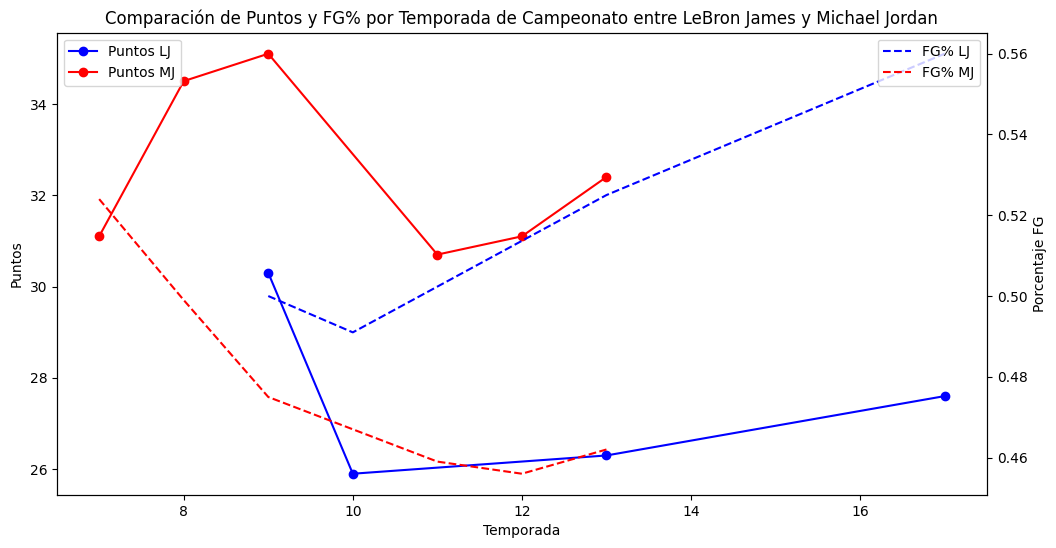

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(temp_camp_lj['id_temporada'], temp_camp_lj['puntos'], label='Puntos LJ', color='blue', marker='o')
ax1.plot(temp_camp_mj['id_temporada'], temp_camp_mj['puntos'], label='Puntos MJ', color='red', marker='o')
ax1.set_xlabel('Temporada')
ax1.set_ylabel('Puntos')
ax1.tick_params(axis='y')
ax1.legend(loc="upper left")

# Crear un segundo eje para el porcentaje de tiros de campo (fg_pct)
ax2 = ax1.twinx()
ax2.plot(temp_camp_lj['id_temporada'], temp_camp_lj['fg_pct'], label='FG% LJ', color='blue', linestyle='--')
ax2.plot(temp_camp_mj['id_temporada'], temp_camp_mj['fg_pct'], label='FG% MJ', color='red', linestyle='--')
ax2.set_ylabel('Porcentaje FG')
ax2.tick_params(axis='y')
ax2.legend(loc="upper right")

plt.title('Comparación de Puntos y FG% por Temporada de Campeonato entre LeBron James y Michael Jordan')
plt.show()


Se puede ver que en relación a sus temporadas de campeonatos, MJ obtuvo más puntos (por encima de 30) en promedio mientras que en su primer campeonato sí tuvo un promedio de puntos mayor a 30. 

Sin embargo, LJ obtuvo mejor porcentaje de tiros de campo en sus campeonatos (todos por encima de 0.50, a excepción de 1) mientras que Jordan en su primer campeonato sí tuvo un porcentaje mayor a 0.50 pero no continuó en los demás.

### Salarios LeBron en el tiempo

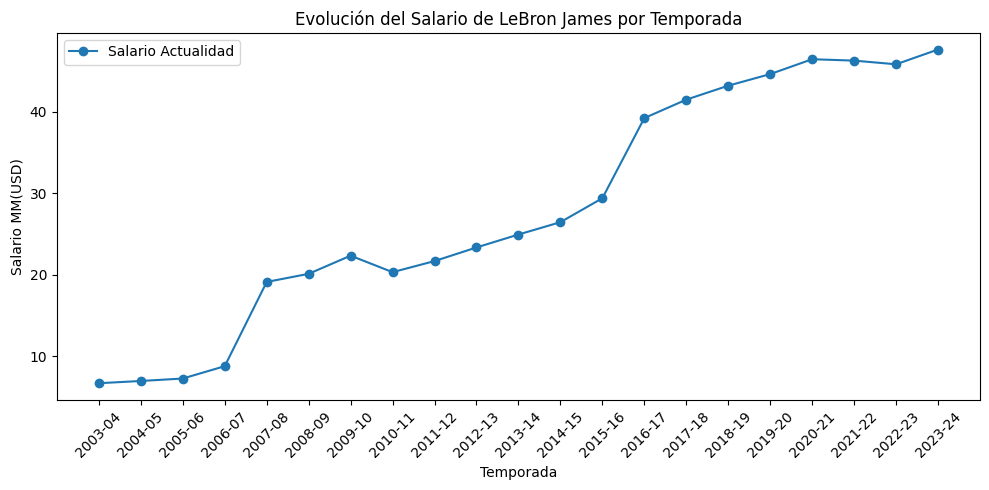

In [36]:
plt.figure(figsize=(10, 5))

plt.plot(sal_lj_temp['temporada'], sal_lj_temp['salario_actualidad'] / 1e6, label='Salario Actualidad', marker='o')

plt.xlabel('Temporada')
plt.ylabel('Salario MM(USD)')
plt.title('Evolución del Salario de LeBron James por Temporada')
plt.xticks(rotation=45)  
plt.legend()

plt.tight_layout()  
plt.show()


En cuanto a salario a través del tiempo, puedo observar que en las 4 primeras temporadas el salario no era de gran elevación pero sí hubo un incremento notable entre la temporada 2006-07 y 2007-08 ya que fue la primera temporada onde LeBron pudo avanzar hasta las finales con los Cleveland Cavaliers.

Se puede ver un ligero descenso entre la séptima y ocatava temporada, justo cuando cambia de equipo a los Miami Heat. En su estancia en los Heat, obtuvo dos títulos 2012 y 2013. Aquí no hay un aumento considerable ya que sigue como tal el aumento en base a lo que venía logrando. Venía de perder una final en el 2011 y luego pierde otra en el 2014 antes de regresa nuevamente a Cleveland.

Nuevamente el aumento sigue siendo gradual, hasta que en el 2016 consigue el primer y único anillo de los Cavs y por ende se puede presenciar un aumento nuevamente considerable a la siguiente temporada. En el 2018, se va a su último equipo pero el aumento salarial no es notorio. Incluso, luego de haber ganado el campeonato en la temporada 2019-20 no hubo diferencia mayor.



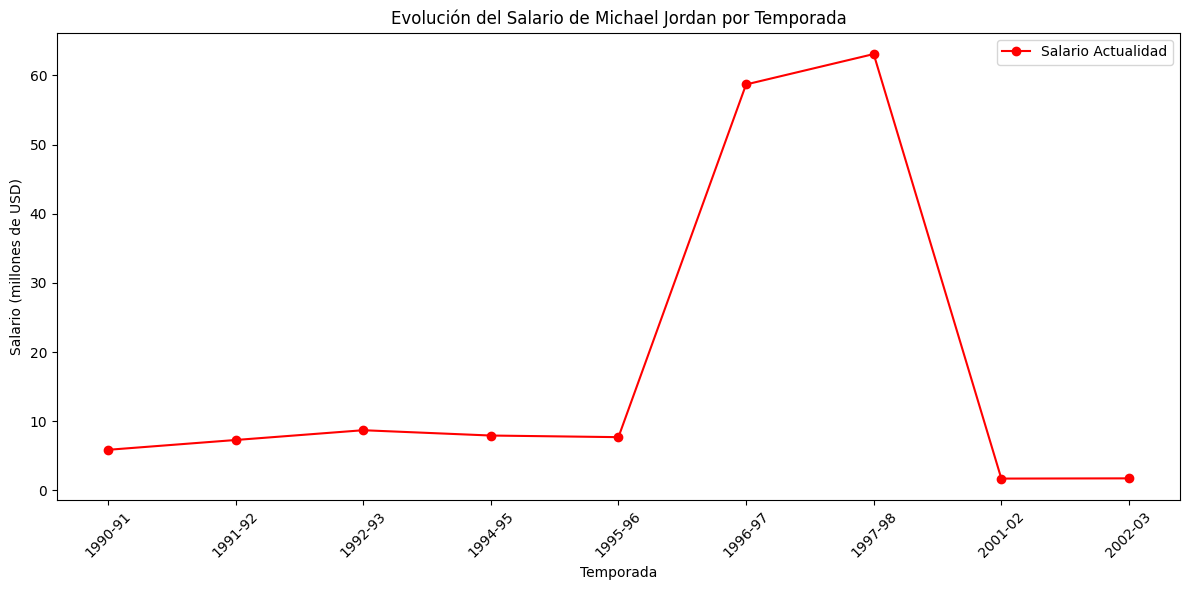

In [37]:
plt.figure(figsize=(12, 6))

# Graficar salario y salario_actualidad
plt.plot(sal_mj_temp['temporada'], sal_mj_temp['salario_actualidad'] / 1e6, label='Salario Actualidad', color='red' ,marker='o')


plt.xlabel('Temporada')
plt.ylabel('Salario (millones de USD)')
plt.title('Evolución del Salario de Michael Jordan por Temporada')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejorar legibilidad
plt.legend()

# Mostrar gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()


Nota: solamente pude conseguir los datos históricos desde la temporada del 90-91. Esta fue la época donde floreció la carrera de Jordan. Ya en el inicio de la década Jordan tenía cierta importancia en la liga pero aún no había conseguido nada. 

En sus primeros 3 títulos (91-93) Jordan estaba en un rango bastante alto, se puede ver que no se presenta la temporada del 93-94 porque Jordan tuvo su primer retiro en esta época. Al volver de lleno a la NBA, en su primera temporada completa logró obtener su 4 anillo. Fruto de esto se puede ver el pico ascendente en su salario para la temporada 96-97, que luego subiría un poco más en su última temporada en los Bulls.

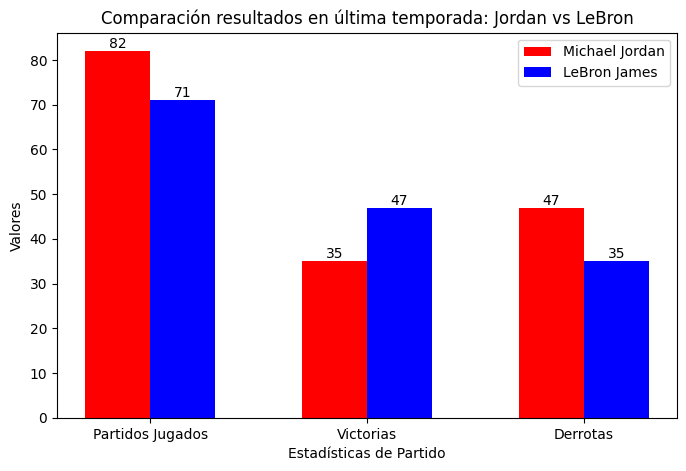

In [38]:
metrics = ['Partidos Jugados', 'Victorias', 'Derrotas']
values_mj = [82, 35, 47]  
values_lj = [71, 47, 35]  

x_positions = [0, 1, 2]  

width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))

bars_mj = ax.bar([x - width/2 for x in x_positions], values_mj, width, label='Michael Jordan', color='red')
bars_lj = ax.bar([x + width/2 for x in x_positions], values_lj, width, label='LeBron James', color='blue')

ax.set_xlabel('Estadísticas de Partido')
ax.set_ylabel('Valores')
ax.set_title('Comparación resultados en última temporada: Jordan vs LeBron')
ax.set_xticks(x_positions)
ax.set_xticklabels(metrics)
ax.legend()

for bar in bars_mj + bars_lj:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


Se puede observar la influencia de cada uno en su última temporada:
- LeBron jugó menos partidos que Jordan (71) con 39 años, logrando 47 victorias y 35 derrotas en estos partidos en los que jugó.
- Jordan por su parte jugó los 82 partidos, obteniendo la victoria en 35 partidos mientras que sufrió más derrotas 47. Cabe destacar que Jordan había regresado por segunda vez del retiro.

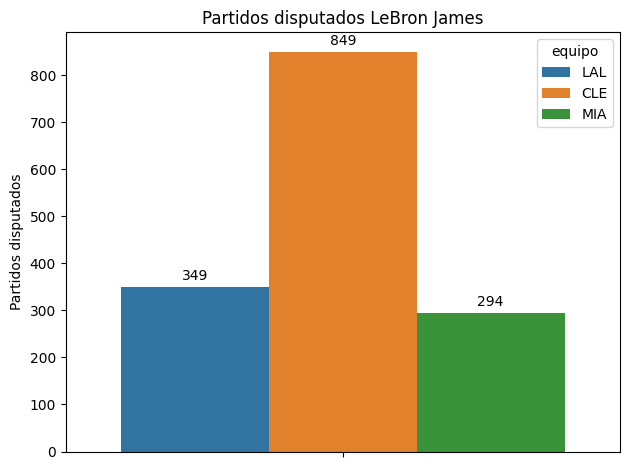

In [39]:
sns.barplot(y='partidos', data=partidos_equip_lj, hue='equipo')

plt.title('Partidos disputados LeBron James')
plt.ylabel('Partidos disputados')
plt.tight_layout()

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', padding=3, fontsize=10)

In [48]:
partidos_por_equipo = partidos_equip_lj.groupby('equipo')['partidos'].sum() # agrupo sus partidos por equip
porcentajes_por_equipo = (partidos_por_equipo / partidos_por_equipo.sum()) * 100 #busco sus porcentajes
porcentajes_por_equipo


equipo
CLE    56.903485
LAL    23.391421
MIA    19.705094
Name: partidos, dtype: float64

Partidos de LeBron:
- De todos sus partidos disputados hasta la temporada 2023-24, LeBron James disputó más del 50% para los Cleveland Cavs entre 2 momentos distintos. 
- Luego sus demás partidos van en un 23% para los Lakers y casi un 20% para los Miami Heat.

Temporadas de Jordan por equipo

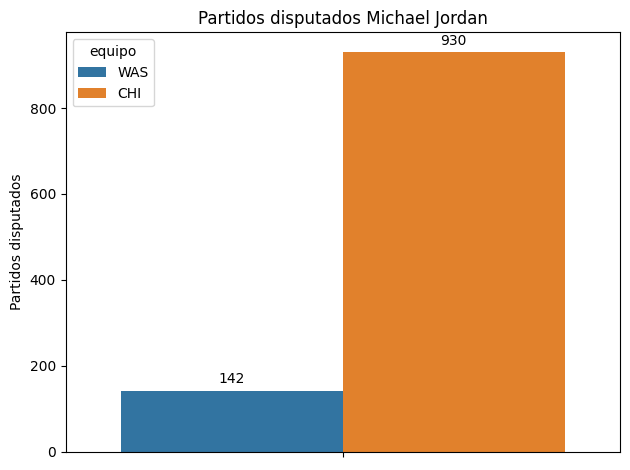

In [49]:
sns.barplot(y='partidos', data=partidos_equip_mj, hue='equipo')

plt.title('Partidos disputados Michael Jordan')
plt.ylabel('Partidos disputados')
plt.tight_layout()

for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', padding=3, fontsize=10)

In [51]:
porcentajes_equipo_mj = partidos_equip_mj.groupby('equipo')['partidos'].sum()
porcentaje_MJ = (porcentajes_equipo_mj/porcentajes_equipo_mj.sum()) * 100
porcentaje_MJ

equipo
CHI    86.753731
WAS    13.246269
Name: partidos, dtype: float64

Michael Jordan, leyenda vida de los Chicago Bulls, representó a este equipo por más del 85% de sus partidos jugados en la liga. En sus 2 temporadas de regreso, del segundo retiro, acumuló 142 partidos para Washington. De esta forma distribuyó su participación en la NBA.

## Resultados en finales: LeBron James

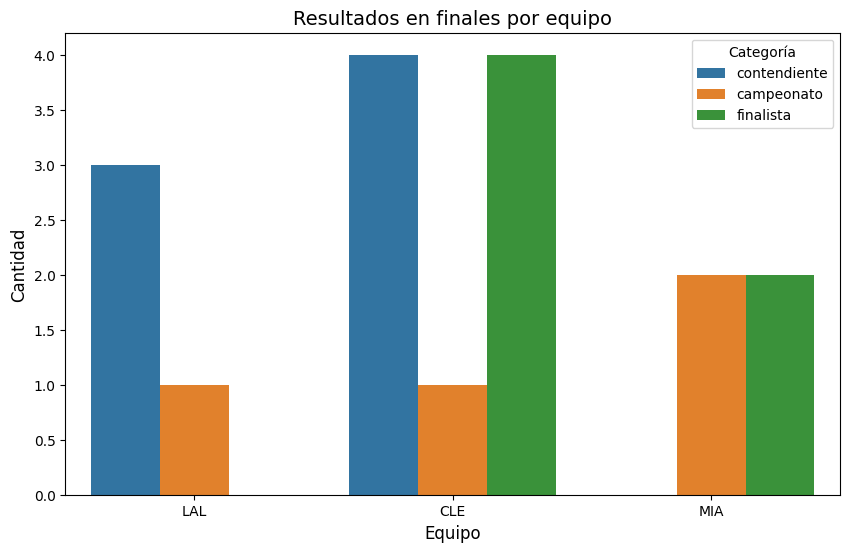

In [69]:
df_largo_lj = campeonatos_equip_lj.melt(id_vars='equipo', 
                                     var_name='categoria', 
                                     value_name='cantidad')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_largo_lj, x='equipo', y='cantidad', hue='categoria')

plt.title('Resultados en finales por equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Categoría', fontsize=10)
plt.xticks(rotation=0)

plt.show()


Aquí podemos ver la distribución de los resultados de Playoffs en las temporadas en las que estuvo en carrera al título. Debajo dejo la gráfica que demuestra las temporadas jugadas en cada equipo para hacer un contexto de esto. 
- Durante su tiempo en LAL: ganó un campeonato y fue contendiente en 3 temporadas.
- Para Cleveland: fue contendiente en 4 ocasiones, sin embargo llegó a perder hasta en 4 ocasiones también. Solo en una fue campeón con el equipo que le dio su primera oportunidad en la NBA y le dio el único título que llevan hoy día.
- Para MIA, ganó dos campeonatos y perdió 2 finales.

([0, 1, 2], [Text(0, 0, 'CLE'), Text(1, 0, 'LAL'), Text(2, 0, 'MIA')])

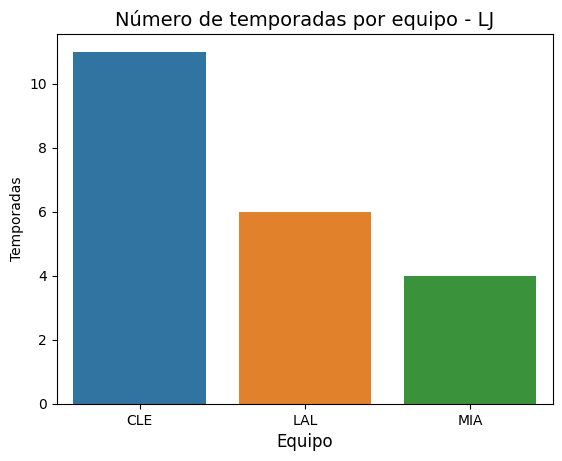

In [77]:
sns.barplot(y='id_temporada', x='equipo',hue='equipo' ,data=conteo_temporadas_lj)

plt.title('Número de temporadas por equipo - LJ', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Temporadas')
plt.xticks(rotation=0)

Jugó 11 temporadas en CLE, 6 hasta el día de hoy en LAL y 4 para MIA.

## Resultados en finales: Michael Jordan

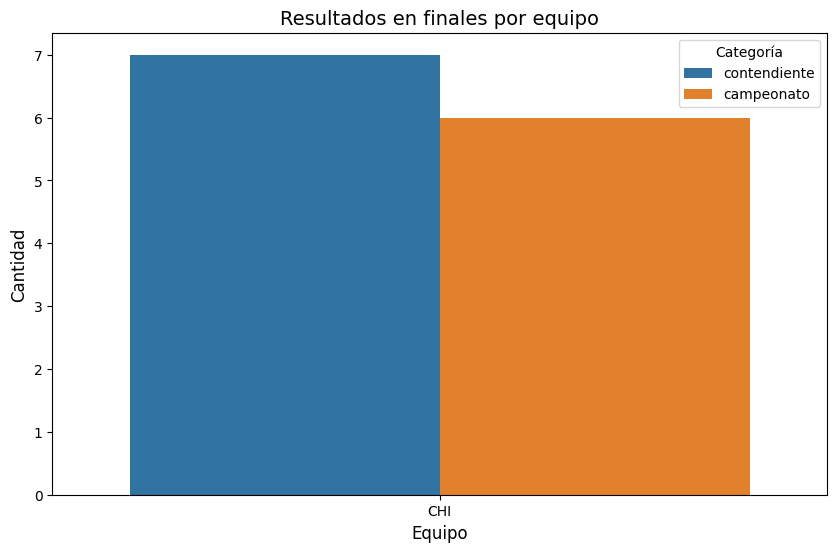

In [70]:
df_largo_mj = campeonatos_equip_mj.melt(id_vars='equipo', 
                                     var_name='categoria', 
                                     value_name='cantidad')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_largo_mj, x='equipo', y='cantidad', hue='categoria')

plt.title('Resultados en finales por equipo', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Categoría', fontsize=10)
plt.xticks(rotation=0)

plt.show()

En estas dos gráficas, dejo el resultado de las finales en las temporadas en las que avanzó a las finales. Aquí se puede ver claramente que solo ganó finales, y tuvo carrera hacia el título pero no finales perdidas. Cabe destacar que estas temporadas de contendiente fueron sus primeras, en la década de los 80, donde tenía mucha más competencia en la liga, un equipo en construcción y una carrera que venía en ascenso. Estas victorias de campeonato llegarán en la década de los 90 cuando tiene un buen equipo, y ha podido superar dinastías que venían en descenso en la liga.

Debajo dejo las temporadas en total por equipo, queda claro que no superó la temporada regular en su breve paso pr Washington.

([0, 1], [Text(0, 0, 'CHI'), Text(1, 0, 'WAS')])

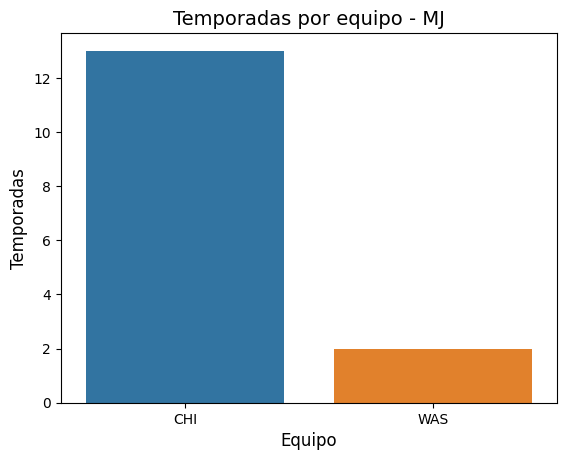

In [78]:
sns.barplot(y='id_temporada', x='equipo',hue='equipo' ,data=conteo_temporadas_mj)

plt.title('Temporadas por equipo - MJ', fontsize=14)
plt.xlabel('Equipo', fontsize=12)
plt.ylabel('Temporadas', fontsize=12)
plt.xticks(rotation=0)

Jugó 13 temporadas para CHI y apenas 2, en su segundo regreso, para WAS.

## Temporada regular

En temporada regular, vamos a analizar el porcentaje de anotación para cada uno.
- A través de un boxplot, vemos la distribución de sus porcentajes de efectividad para ambos jugadores.
    - LJ tiene una distribución con una mediana mayor a .50, muy similar a su media total entre todas sus temporadas. Tiene un rango interquartilico bastante cercano, aunque cuenta con un valor atípico. Sin embargo, tiene una media más alta y también una mediana. 
    - Para MJ, tiene una distribución ligeramente menor en comparación a LeBron y su mediana es cercana pero no llega a 0.50. Sin embargo, esta es mayor a su media por lo que podemos decir que tuvo temporadas donde su FG_PCT efectividad fue ligeramente más baja lo que va acorde con los bigotes que que muestra. 
    - En general ambos tienen una efectividad bastante superior, pero según los datos LeBron James ha sido un poco más eficaz en general durante las temporadas regulares.

(array([0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58]),
 [Text(0.4, 0, '0.40'),
  Text(0.42000000000000004, 0, '0.42'),
  Text(0.44, 0, '0.44'),
  Text(0.46, 0, '0.46'),
  Text(0.48000000000000004, 0, '0.48'),
  Text(0.5, 0, '0.50'),
  Text(0.52, 0, '0.52'),
  Text(0.54, 0, '0.54'),
  Text(0.56, 0, '0.56'),
  Text(0.5800000000000001, 0, '0.58')])

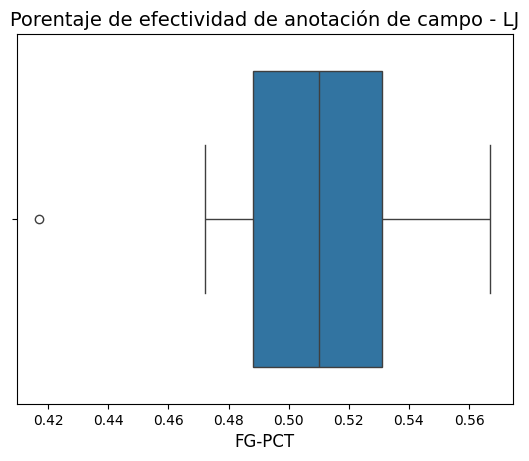

In [79]:
sns.boxplot(x='fg_pct', data=temp_regular_stats_lj)
plt.title('Porentaje de efectividad de anotación de campo - LJ', fontsize=14)
plt.xlabel('FG-PCT', fontsize=12)
plt.xticks(rotation=0)

In [80]:
temp_regular_stats_lj['fg_pct'].mean()

0.5081904761904762

(array([0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56]),
 [Text(0.4, 0, '0.40'),
  Text(0.42000000000000004, 0, '0.42'),
  Text(0.44, 0, '0.44'),
  Text(0.46, 0, '0.46'),
  Text(0.48000000000000004, 0, '0.48'),
  Text(0.5, 0, '0.50'),
  Text(0.52, 0, '0.52'),
  Text(0.54, 0, '0.54'),
  Text(0.56, 0, '0.56')])

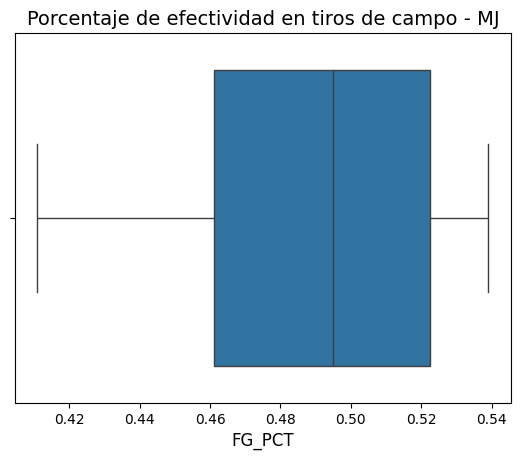

In [81]:
sns.boxplot(x='fg_pct', data=temp_regular_stats_mj)
plt.title('Porcentaje de efectividad en tiros de campo - MJ', fontsize=14)
plt.xlabel('FG_PCT', fontsize=12)
plt.xticks(rotation=0)

In [82]:
temp_regular_stats_mj['fg_pct'].mean()

0.4882666666666667

In [83]:
temp_regular_stats_mj.describe()

,id_temporada,partidos_jugados,minutos,fg_pct,reb,ast,blk,pts
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,71.466667,2733.866667,0.488267,444.800000,375.533333,59.533333,2152.800000
std,4.472136,22.617524,928.632856,0.042286,159.566914,156.829692,34.112978,816.555501
min,1.000000,17.000000,451.000000,0.411000,64.000000,53.000000,13.000000,408.000000
25%,4.500000,79.000000,3031.500000,0.461000,439.500000,310.500000,40.500000,1976.500000
50%,8.000000,82.000000,3102.000000,0.495000,492.000000,377.000000,54.000000,2431.000000
75%,11.500000,82.000000,3189.000000,0.522500,528.000000,483.000000,72.000000,2606.500000
max,15.000000,82.000000,3311.000000,0.539000,652.000000,650.000000,131.000000,3041.000000


In [84]:
temp_regular_stats_lj.describe()

,id_temporada,partidos_jugados,victorias,derrotas,w_l_pct,min,fg_pct,reb,ast,blk,pts
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,71.047619,45.952381,25.095238,0.643333,2695.190476,0.508190,532.619048,524.238095,52.904762,1927.333333
std,6.204837,10.471276,11.512933,8.496498,0.115023,513.135423,0.035005,84.569780,108.152626,18.321858,328.583830
min,1.000000,45.000000,25.000000,15.000000,0.418000,1504.000000,0.417000,346.000000,349.000000,25.000000,1126.000000
25%,6.000000,67.000000,41.000000,17.000000,0.577000,2326.000000,0.488000,465.000000,465.000000,38.000000,1695.000000
50%,11.000000,76.000000,47.000000,25.000000,0.667000,2877.000000,0.510000,533.000000,521.000000,50.000000,1954.000000
75%,16.000000,79.000000,52.000000,31.000000,0.726000,3054.000000,0.531000,590.000000,587.000000,66.000000,2175.000000
max,21.000000,82.000000,66.000000,46.000000,0.815000,3384.000000,0.567000,709.000000,747.000000,93.000000,2478.000000


## Playoffs

### LeBron

Vemos que en distribución, tenemos datos similares sin embargo nuevamente LeBron James se alza con una mediana mayor a Jordan. Para MJ la media y mediana son casi idénticas, cayendo a un 0.48% de efectividad mientras que LJ tiene una media y una mediana prácticamente en 0.50%. Es necesario comentar que, a diferencia de LJ, Jordan contaba con uno de los mejores equipos de la historia por no decir el mejor. Esto demuestra que a pesar de quizás no tener mejores números podría conseguir títulos con el apoyo de un equipo histórico que consiguió 6 finales de  disputadas entre 1991 y 1998. En el caso de LeBron, solo en un momento formó parte de un equipo épico (Miami Heat) donde alcanzó la final en 4 ocasiones consecutivas de las cuales se llevó 2 campeonatos.

- Así mismo, vemos que con el pasar de los años el porcentaje de anotación era igual o mejor que el año anterior con pocas excepciones. Destacando que este llegó a superar el 0.50% con aparente facilidad y mucha repetición. Esto incluso en su última temporada logrando un porcentaje mayor a 0.56%.
- En el caso de Jordan, se puede ver un inicio bastante alto pero que luego iba decayendo a medida que pasaban las temporadas, diferente a LeBron que iba subiendo y mejorando sus datos con el paso del tiempo.

<Axes: xlabel='fg_pct'>

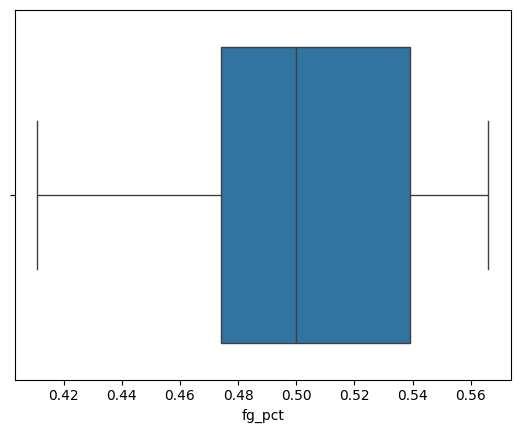

In [89]:
sns.boxplot(x='fg_pct',data=temp_playoffs_stats_lj)

<Axes: xlabel='id_temp', ylabel='fg_pct'>

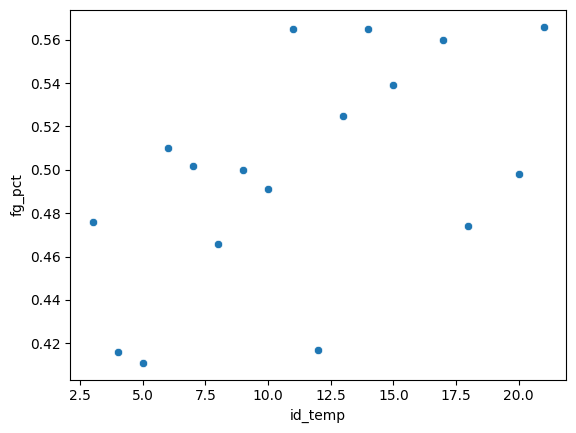

In [ ]:
sns.scatterplot(y='fg_pct', x='id_temp' ,data=temp_playoffs_stats_lj)

In [95]:
temp_playoffs_stats_lj['fg_pct'].describe()

count    17.000000
mean      0.498882
std       0.051837
min       0.411000
25%       0.474000
50%       0.500000
75%       0.539000
max       0.566000
Name: fg_pct, dtype: float64

### Jordan

<Axes: xlabel='id_temp', ylabel='fg_pct'>

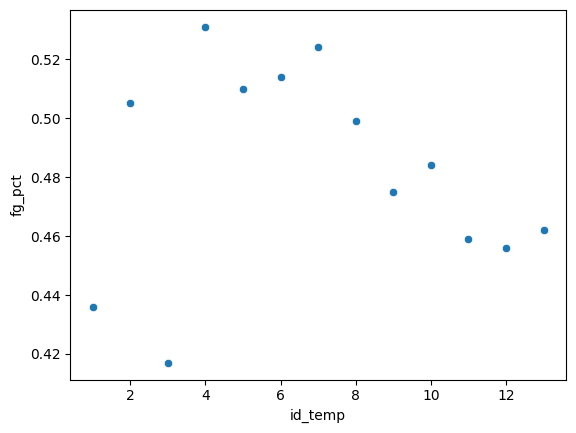

In [91]:
sns.scatterplot(y='fg_pct', x='id_temp' ,data=temp_playoffs_stats_mj)

<Axes: xlabel='fg_pct'>

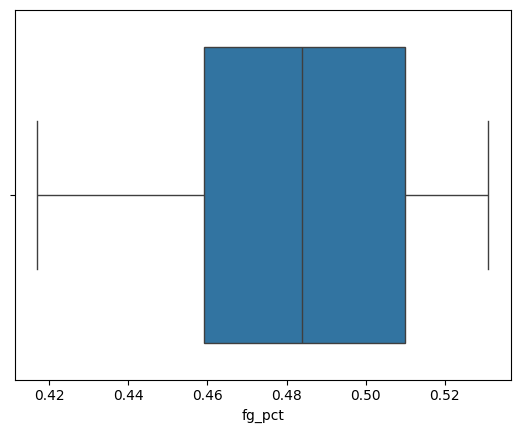

In [93]:
sns.boxplot(x='fg_pct',data=temp_playoffs_stats_mj)


In [96]:
temp_playoffs_stats_mj['fg_pct'].describe()

count    13.000000
mean      0.482462
std       0.035104
min       0.417000
25%       0.459000
50%       0.484000
75%       0.510000
max       0.531000
Name: fg_pct, dtype: float64

## Aportes a franquicias

En estas dos gráficas podemos representar el impacto que tuvieron estos jugadores para la historia de las franquicias para las que jugaron.

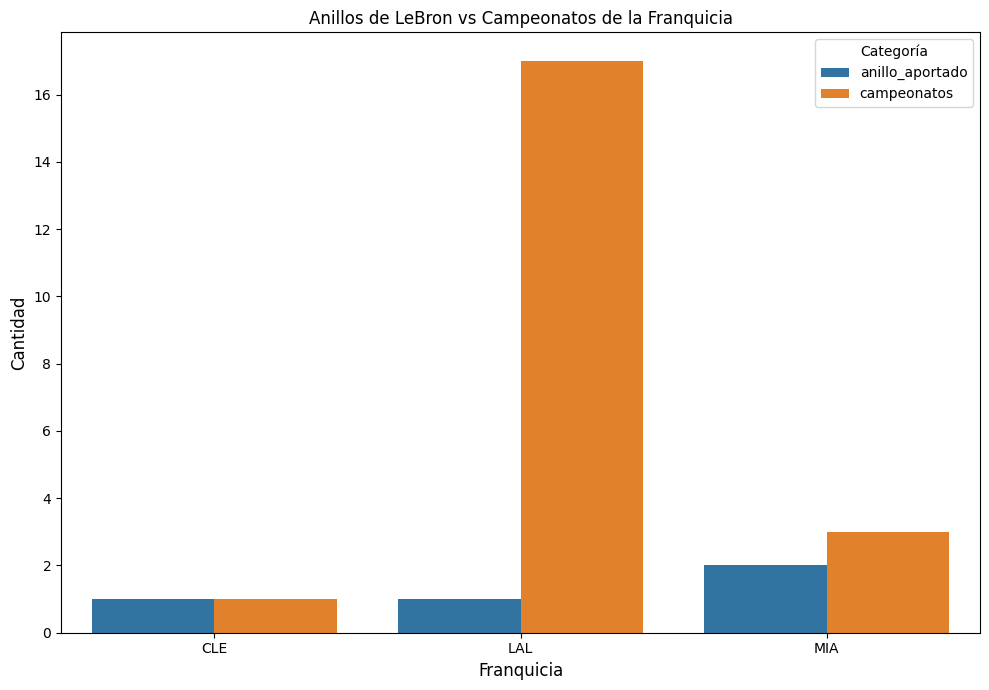

In [ ]:
anillo_franquicia_melted = anillo_franquicia_lj.melt(
    id_vars='team_code', 
    value_vars=['anillo_aportado', 'campeonatos'], 
    var_name='Tipo', 
    value_name='Cantidad'
)

plt.figure(figsize=(10, 7))
sns.barplot(x='team_code', y='Cantidad', hue='Tipo', data=anillo_franquicia_melted)
plt.title('Anillos de LeBron vs Campeonatos de la Franquicia')
plt.xlabel('Franquicia', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Categoría', fontsize=10)
plt.tight_layout()

LeBron le otorgó el único anillo que tiene hoy día Cleveland, le otorgó 1 de los 17 anillos de los LAL y 2 de los 3 que tiene Miami Heat.

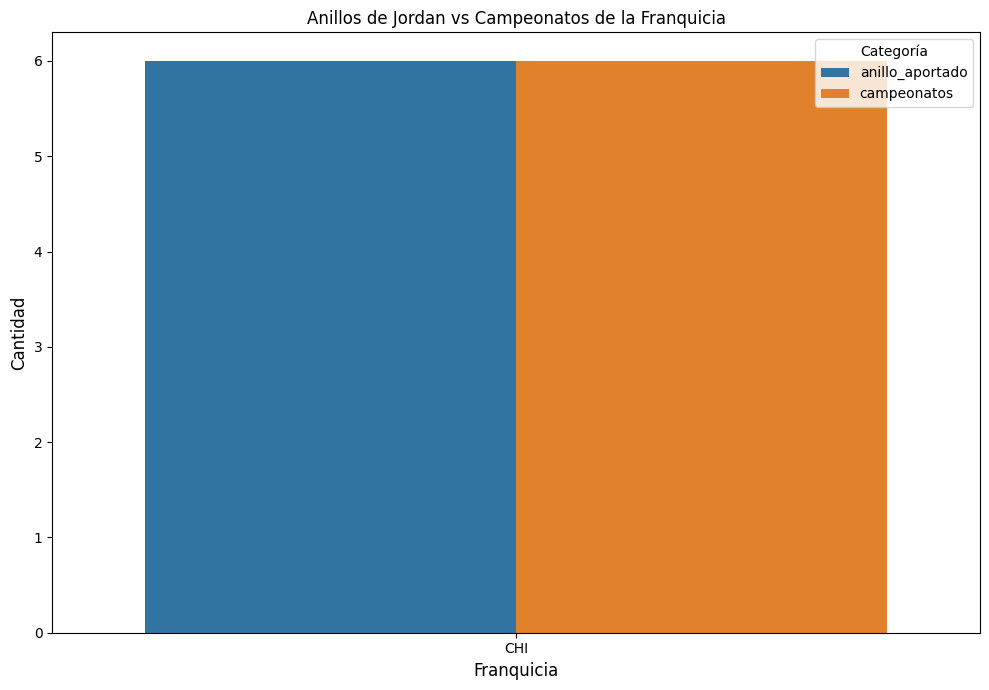

In [108]:
anillo_franquicia_mj_melted = anillo_franquicia_mj.melt(
    id_vars='team_code', 
    value_vars=['anillo_aportado', 'campeonatos'], 
    var_name='Tipo', 
    value_name='Cantidad'
)

plt.figure(figsize=(10, 7))
sns.barplot(x='team_code', y='Cantidad', hue='Tipo', data=anillo_franquicia_mj_melted)
plt.title('Anillos de Jordan vs Campeonatos de la Franquicia')
plt.xlabel('Franquicia', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='Categoría', fontsize=10)
plt.tight_layout()

Aquí se puede ver lo que significó Jordan para CHI, le dio los 6 campeonatos que tiene hoy día.

# Conclusiones finales

# Comparativa entre Michael Jordan (MJ) y LeBron James (LJ)

---

## **Rendimiento en temporadas de campeonatos**
- **Michael Jordan (MJ):**
  - Promedió **más de 30 puntos por partido** en sus temporadas de campeonato.
  - En su primer campeonato logró un porcentaje de tiros de campo **mayor a 0.50**, pero este porcentaje disminuyó en campeonatos posteriores.

- **LeBron James (LJ):**
  - Superó consistentemente el **50% de efectividad en tiros de campo** en casi todos sus campeonatos, excepto en uno.
  - A nivel de eficiencia en tiros de campo, LeBron tuvo un rendimiento superior en sus temporadas de campeonato en comparación con Jordan.

---

## **Evolución salarial**
- **MJ:**
  - Su salario comenzó a aumentar notablemente a partir de su regreso completo en la temporada **1995-96**.
  - Los picos salariales más altos ocurrieron en las temporadas **1996-97 y 1997-98**, durante sus últimos años con los Bulls.

- **LJ:**
  - En sus primeras temporadas, los salarios eran bajos, pero hubo un incremento significativo entre **2006-07 y 2007-08**, tras llegar a las finales con los Cleveland Cavaliers.
  - Cambiar a los Miami Heat no trajo un aumento salarial considerable, a pesar de los éxitos en **2012 y 2013**. Los aumentos continuaron de manera gradual.
  - Después de ganar el campeonato con los Cavaliers en **2016**, se registró un aumento notable. Sin embargo, no hubo diferencias significativas en su salario tras unirse a los Lakers ni después de ganar el campeonato en **2019-20**.

---

## **Últimas temporadas**
- **MJ:**
  - En su última temporada, jugó los **82 partidos completos** a los 39 años con los Wizards, obteniendo **35 victorias y 47 derrotas**.
- **LJ:**
  - A los 39 años, LeBron jugó **71 partidos** con los Lakers, logrando **47 victorias y 35 derrotas**, un rendimiento superior al de MJ en su última temporada.

---

## **Distribución de partidos por equipo**
- **MJ:**
  - Representó a los Chicago Bulls en más del **85% de los partidos** de su carrera, acumulando solo **142 partidos** con los Wizards.
- **LJ:**
  - Jugó más del **50% de sus partidos** para los Cavaliers (en dos períodos).
  - Sus participaciones restantes se dividen entre los Lakers (**23%**) y los Heat (**20%**).

---

## **Finales y campeonatos**
- **MJ:**
  - Ganó **6 campeonatos** en todas las finales que disputó (100% de efectividad).
  - Logró sus títulos entre **1991 y 1998**, consolidando una de las dinastías más grandes de la historia con un equipo histórico.
- **LJ:**
  - Llegó a **10 finales**, ganando **4 campeonatos** (2 con Miami, 1 con Cleveland y 1 con los Lakers).
  - Experimentó derrotas en finales en todas las franquicias donde jugó, pero alcanzó la cima en momentos clave con equipos en construcción o históricos.

---

## **Efectividad en tiros de campo (FG%)**
- **MJ:**
  - Mediana: **49.5%**, Media: **48.83%**.
  - Su efectividad inicial fue alta pero decayó a lo largo de los años. Los bigotes del boxplot sugieren algunas temporadas con efectividad ligeramente más baja.
  - A pesar de ser ligeramente menos eficiente que LeBron en tiros de campo, MJ compensó con su capacidad de liderar un equipo histórico a múltiples títulos.

- **LJ:**
  - Mediana: **51%**, Media: **50.82%**.
  - Mostró una mejora constante en su FG% con los años, superando con regularidad el **50%** y alcanzando más del **56%** en su última temporada.
  - Su distribución de FG% refleja una consistencia impresionante y un valor atípico menor que no afecta significativamente su rendimiento general.

---

## **Conclusión General**
- **Michael Jordan:**
  - Fue un anotador prolífico con un impacto increíble en el juego, liderando a los Bulls a una de las mejores eras en la historia del baloncesto. Su efectividad en tiros de campo fue alta, pero no alcanzó la consistencia de LeBron. A pesar de esto, MJ ganó todos los campeonatos que disputó, demostrando un liderazgo excepcional en momentos decisivos.

- **LeBron James:**
  - Destacó por su **consistencia** y **eficiencia** a lo largo de su carrera, con un FG% superior al de MJ tanto en temporadas regulares como en campeonatos. Aunque no tiene el mismo porcentaje de victorias en finales, LeBron mostró una gran versatilidad y resiliencia al alcanzar éxitos con equipos distintos y en diferentes etapas de su carrera.

---

Ambos jugadores son ejemplos de excelencia, pero sus logros y estilo de juego resaltan diferentes tipos de grandeza: **la efectividad y longevidad de LeBron** frente a **la capacidad decisiva y dominio de MJ en las finales**. 🏀
